In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

/home/yannick/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
im = cv2.imread('Data/frame0036.jpg',0)
def callback(x):
    pass
a = 0
cv2.namedWindow('image')
cv2.createTrackbar('filter','image',0,1000,callback)
cv2.createTrackbar('filter2','image',0,1000,callback)

while(True):
    edges= cv2.Canny(im,255,720) # a = 255, b = 720 
    ret, thresh = cv2.threshold(im, a, 255, cv2.THRESH_BINARY_INV)
    cv2.imshow("thresh",thresh)
    thresh_adapt = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
    #cv2.imshow("edge",thresh_adapt)
    edges_a= cv2.Canny(thresh_adapt,a,b)
    cv2.imshow("image",edges_a)
    cv2.imwrite('edges.jpg',thresh_adapt)
    _, contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    im2 = im.copy()
    
    objects = np.zeros([im.shape[0],im.shape[1],3], 'uint8')
    
    for c in contours:
        area = cv2.contourArea(c)
        if area >= 1:
            cv2.drawContours(objects,[c],-1,(255,0,0),-1)

            M = cv2.moments(c)
            cx = int( M['m10']/M['m00'])
            cy = int( M['m01']/M['m00'])
            cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
    cv2.imshow('objects',objects)
    cv2.imwrite('objects.jpg',objects)
    a = cv2.getTrackbarPos('filter','image')
    b = cv2.getTrackbarPos('filter2','image')
    key = cv2.waitKey(1) & 0xFFFF
    
    if key == 27:
        break;
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

NameError: global name 'print61' is not defined

(480, 640, 3)


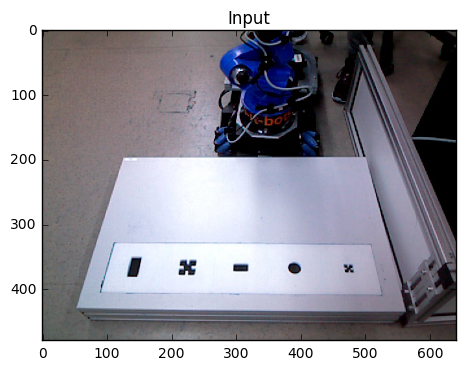

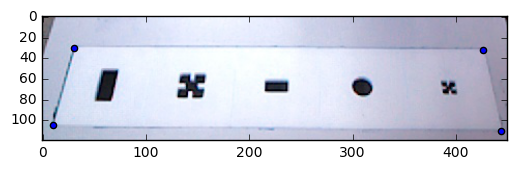

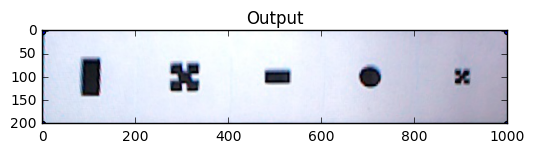

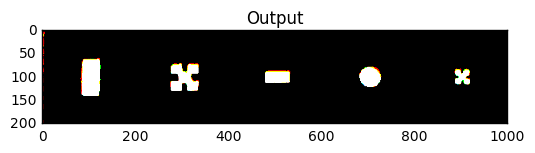

In [31]:
img = cv2.imread('Data/frame0024.jpg')
print img.shape
crop = img[300:420,80:530]
cv2.imwrite('cropped.jpg',crop)
rows,cols,ch = img.shape
plt.imshow(img),plt.title('Input')
plt.show()
pts1 = np.float32([[30,30],[426,32],[10,105],[444,110]])

plt.scatter(pts1[:,0],pts1[:,1])
plt.imshow(crop)
plt.show()

def homography(im,pts1):
    pts2 = np.float32([[0,0],[1000,0],[0,200],[1000,200]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(crop,M,(1000,200))
    cv2.imwrite('warped.jpg',dst)
    ret, thresh = cv2.threshold(dst, 120, 255, cv2.THRESH_BINARY_INV)
    #thresh_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
    
    plt.scatter(pts2[:,0],pts2[:,1]),plt.imshow(dst),plt.title('Output')
    plt.show()
    plt.imshow(thresh),plt.title('Output')
    plt.show()

homography(crop,pts1)